## Preparando ambiente

In [23]:
install.packages('ggplot2')
require(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
install.packages('gridExtra')
require(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
install.packages('tidyverse')
require(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Base de dados





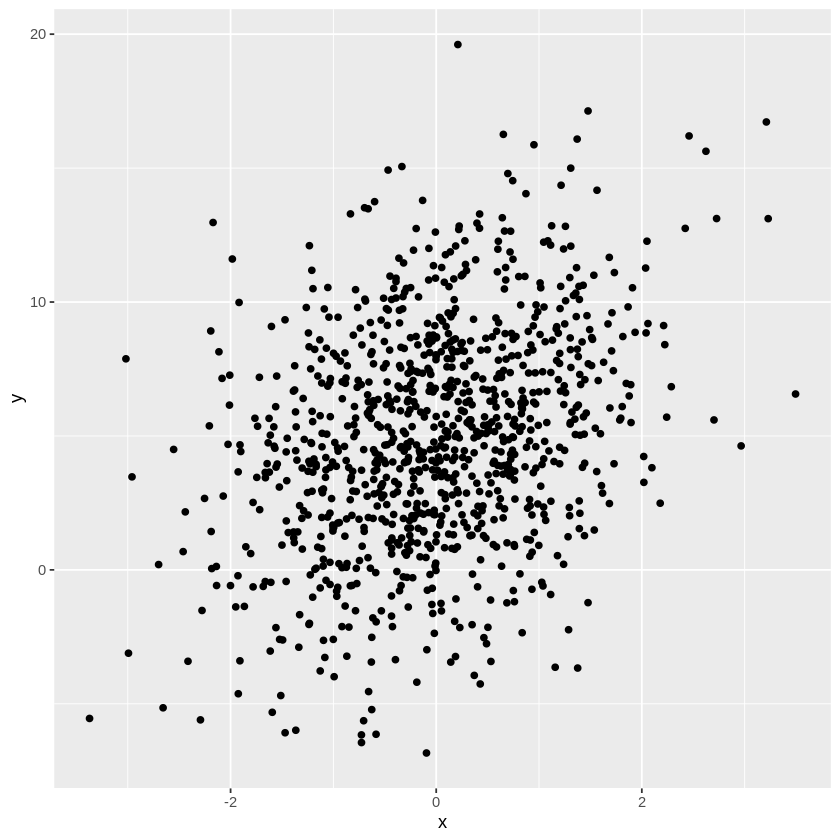

In [26]:
set.seed(42)
n = 1000
x = rnorm(n)

a = 5
b = 1.3
e = 4

y = a + b*x + rnorm(n, sd = e)

sim_d = data.frame(x = x, y = y)

ggplot(sim_d, aes(x, y)) +
  geom_point() 

# Possíveis parâmetros

Se $\theta_0$ = 4 e $\theta_1$ = 1:

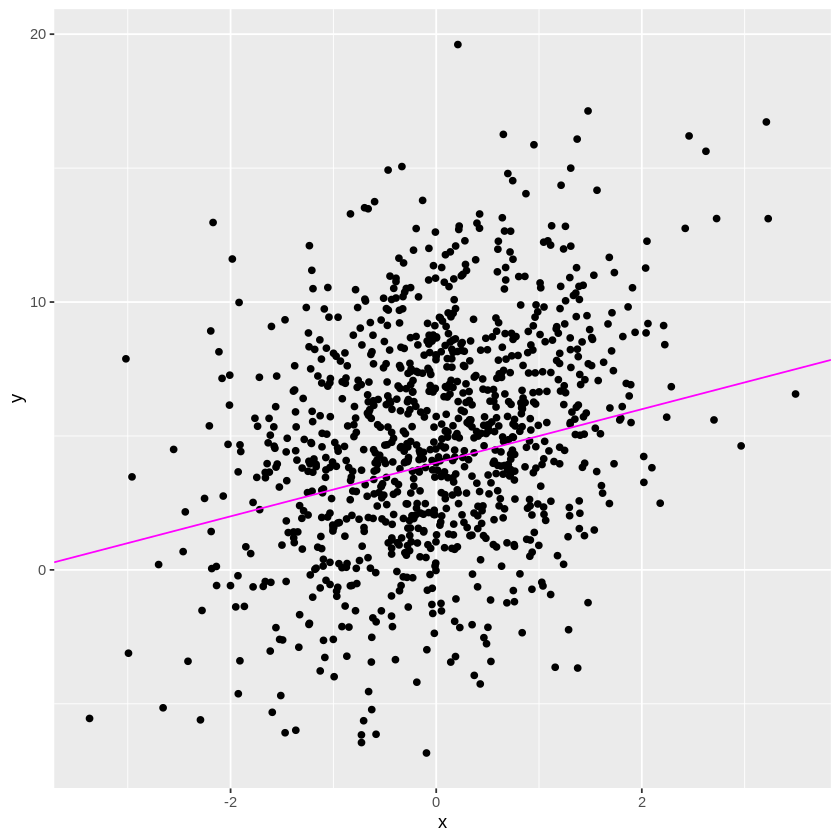

In [27]:
ggplot(sim_d, aes(x, y)) +
  geom_point() +
  geom_abline(aes(intercept = 4, slope = 1),
              color = "magenta")

Se $\theta_0$ = 8 e $\theta_1$ = 0:

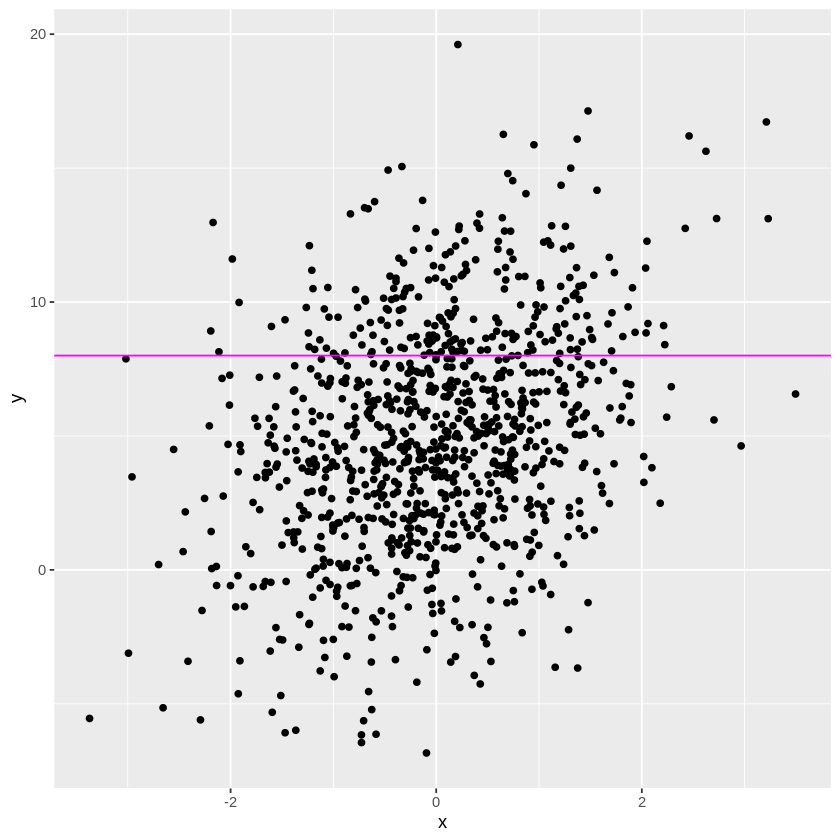

In [28]:
ggplot(sim_d, aes(x, y)) +
  geom_point() +
  geom_abline(aes(intercept = 8, slope = 0),
              color = "magenta")

Se $\theta_0$ = 1 e $\theta_1$ = 1:

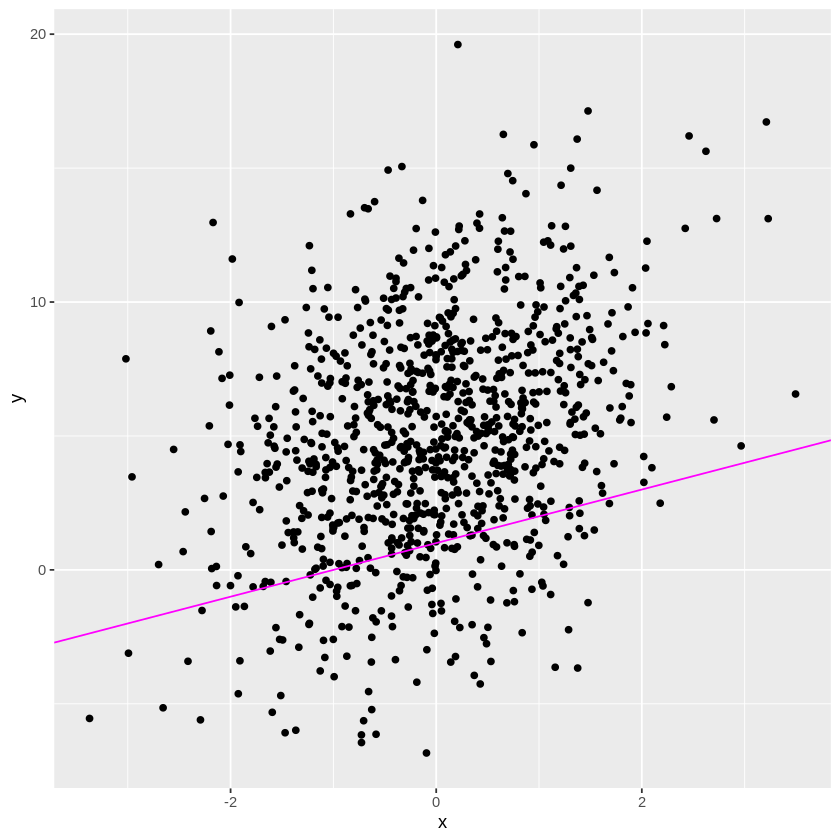

In [29]:
ggplot(sim_d, aes(x, y)) +
  geom_point() +
  geom_abline(aes(intercept = 1, slope = 1),
              color = "magenta")

Quais parâmetros descrevem melhor a relação?

# Superfície de custo

In [30]:
mse = function(a, b, x = sim_d$x, y = sim_d$y) {
  prediction = a + b*x
  residuals = y - prediction
  squared_residuals = residuals^2
  ssr = sum(squared_residuals)
  mean(ssr)
}

In [31]:
solucao = expand_grid(t0 = 0:10, t1 = -5:10)
solucao$mse = 0
for(i in 1:nrow(solucao)){
  solucao[i,3] = mse(a = as.numeric(solucao[i, 1]), b = as.numeric(solucao[i, 2]), x = sim_d$x, y = sim_d$y)
}

Warning message:
“Ignoring unknown parameters: bin”


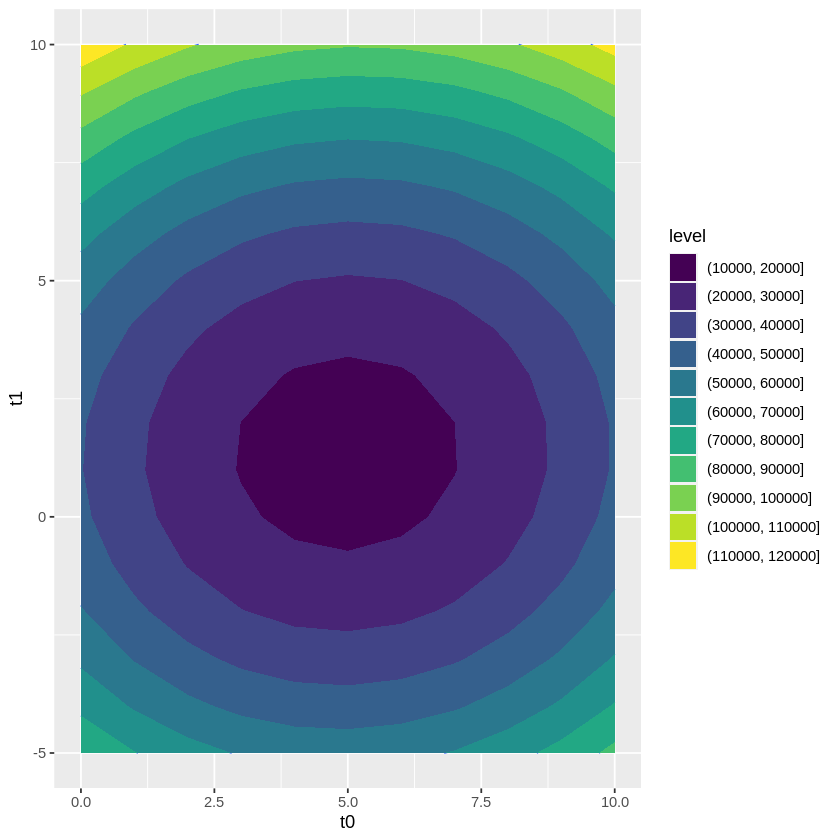

In [32]:
ggplot(solucao, aes(t0, t1, z = mse)) + geom_contour(bin = 50) + geom_contour_filled()

# Gradiente descendente

In [33]:
compute_gradient = function(a, b, x = sim_d$x, y = sim_d$y) {
  n = length(y)
  predictions = a + (b * x)
  residuals = y - predictions
  
  da = (1/n) * sum(-2*residuals)
  db = (1/n) * sum(-2*x*residuals)
  
  c(da, db)
}

In [34]:
gd_step = function(a, b, 
                    learning_rate = 0.1, 
                    x = sim_d$x, 
                    y = sim_d$y) {
  grad = compute_gradient(a, b, x, y)
  step_a = grad[1] * learning_rate
  step_b = grad[2] * learning_rate
  
  c(a - step_a, b - step_b)
}

In [35]:
walk = gd_step(0, 0)
walk

[1] 0.9890313 0.2433964

In [36]:
walk = gd_step(walk[1], walk[2])
walk

[1] 1.7815134 0.4429925

In [37]:
walk = gd_step(walk[1], walk[2])
walk

[1] 2.4165300 0.6065743

In [38]:
for(i in 1:25) {
  walk = gd_step(walk[1], walk[2])
}
walk

[1] 4.969496 1.335003

In [39]:
estimate_gradient = function(pars_tbl, learning_rate = 0.1, x = sim_d$x, y = sim_d$y) {
  
  pars = gd_step(pars_tbl[["a"]], pars_tbl[["b"]],
                  learning_rate)
  
  tibble(a = pars[1], b = pars[2], mse = mse(a, b, x, y))
}

# initialize
grad = estimate_gradient(tibble(a = 0, b = 0))

# loop through
for(i in 2:50) {
  grad[i, ] = estimate_gradient(grad[i - 1, ])
}
grad

a,b,mse
<dbl>,<dbl>,<dbl>
0.9890313,0.2433964,32446.45
1.7815134,0.4429925,26427.67
2.4165300,0.6065743,22552.39
2.9253881,0.7405655,20056.94
3.3331667,0.8502604,18449.84
3.6599561,0.9400191,17414.73
3.9218512,1.0134293,16747.96
4.1317465,1.0734410,16318.41
4.2999726,1.1224779,16041.65


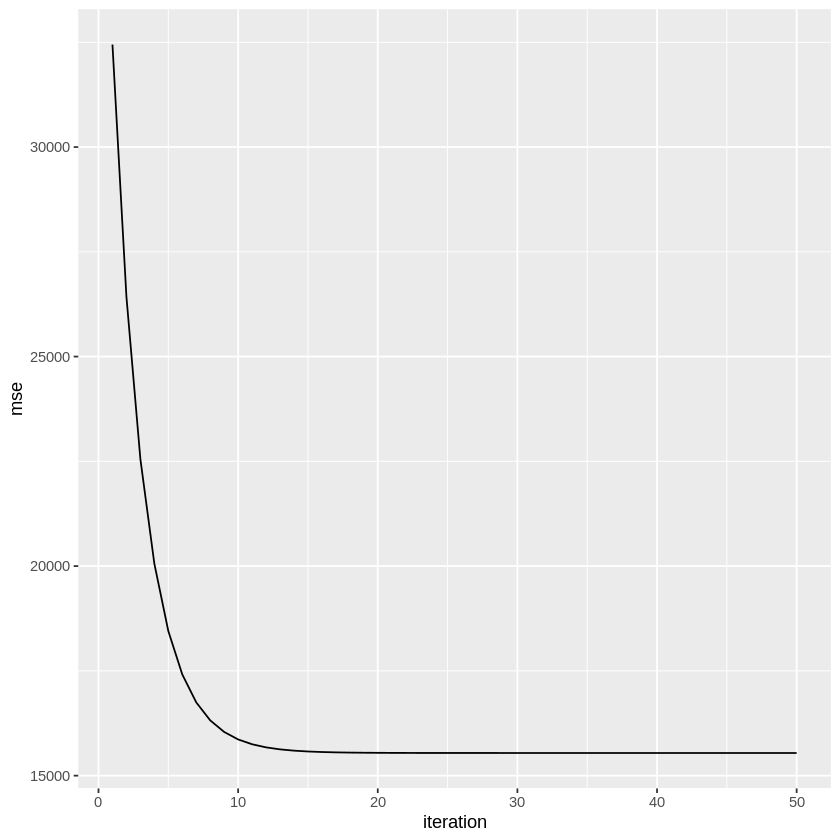

In [40]:
grad = grad %>% 
  rowid_to_column("iteration")

ggplot(grad, aes(iteration, mse)) +
  geom_line()

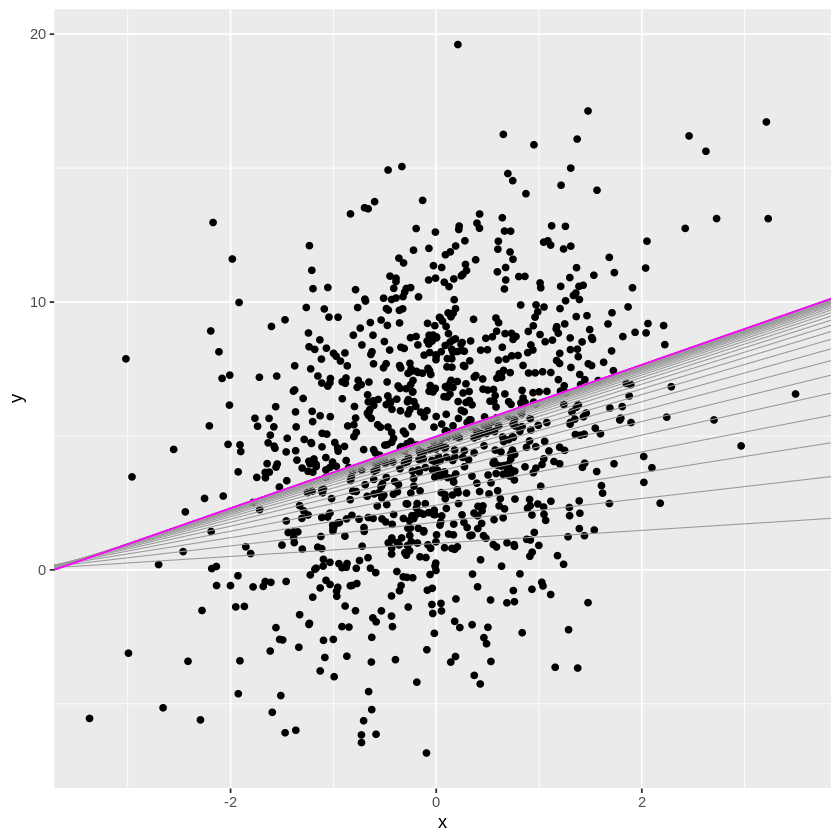

In [41]:
ggplot(sim_d, aes(x, y)) +
  geom_point() +
  geom_abline(aes(intercept = a, slope = b),
              data = grad,
              color = "gray60",
              size = 0.3) +
  geom_abline(aes(intercept = a, slope = b),
              data = grad[nrow(grad), ],
              color = "magenta")